In [0]:
###################################################################
# This is code for Logistic Regression model
#
#
# Step: Load necessary libraries
###################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
###################################################################
# Step: Load dataset
###################################################################
train = pd.read_csv('Monitoring_Trends_in_Burn_Severity_Burned_Area_Boundaries_Feature_Layer.csv')

In [3]:
###################################################################
# Step: Load top 5 data instances
###################################################################
train.head()

,OBJECTID,ACRES,FIRE_ID,FIRE_NAME,YEAR,STARTMONTH,STARTDAY,SHAPE_Length,SHAPE_Area,FIRE_TYPE
0,1,1520,AK5674215793820060522,MESHIK RIVER,2006,5,22,26430.88478,2.039991e+07,2
1,2,4482,AK5759815753720050529,PILOT POINT,2005,5,29,45516.68117,6.298838e+07,2
2,3,3419,AK5761615232120150828,TWIN CREEKS,2015,8,28,78088.82515,4.806401e+07,2
3,4,5335,AK5884115754320150622,COPENHAGEN CREEK,2015,6,22,60614.97438,8.037206e+07,2
4,5,9684,AK5884415640120150621,PAULS CREEK,2015,6,21,95614.83278,1.460184e+08,2


In [4]:
###################################################################
# Step: Load metadata / information about dataset
###################################################################
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21673 entries, 0 to 21672
Data columns (total 10 columns):
OBJECTID        21673 non-null int64
ACRES           21673 non-null int64
FIRE_ID         21673 non-null object
FIRE_NAME       21673 non-null object
YEAR            21673 non-null int64
STARTMONTH      21673 non-null int64
STARTDAY        21673 non-null int64
SHAPE_Length    21673 non-null float64
SHAPE_Area      21673 non-null float64
FIRE_TYPE       21673 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.7+ MB


In [0]:
###################################################################
# Step: Load unnecessary features into buffer for future use
###################################################################
fireid = pd.get_dummies(train['FIRE_ID'],drop_first=True)
firename = pd.get_dummies(train['FIRE_NAME'],drop_first=True)

In [0]:
###################################################################
# Step: Drop unnecessary data features
###################################################################
train.drop(['FIRE_ID','FIRE_NAME'],axis=1,inplace=True)

In [0]:
###################################################################
# Step: Split data into training and testing set by
#       randomly choosing instances in ratio 70:30
###################################################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('FIRE_TYPE',axis=1),train['FIRE_TYPE'], test_size=0.30,random_state=101)

In [8]:
###################################################################
# Step: Build and train Logistic regression model
###################################################################
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [9]:
###################################################################
# Step: Test logistic regression model
###################################################################
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,predictions))
print("Accuracy of logistic regression model is :",accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1625
           1       0.00      0.00      0.00      1036
           2       0.58      1.00      0.73      3777
           3       0.00      0.00      0.00        64

   micro avg       0.58      0.58      0.58      6502
   macro avg       0.15      0.25      0.18      6502
weighted avg       0.34      0.58      0.43      6502

Accuracy of logistic regression model is : 0.5808981851737927


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
###################################################################
# Step: Perform k-fold cross validation
###################################################################
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
k_range = [5,10,15,20,25,30,35,40,45,50]
k_scores = []
for k in k_range:
    scores = cross_val_score(logmodel, train.drop('FIRE_TYPE',axis=1), train['FIRE_TYPE'], cv=k, scoring='accuracy')
    k_scores.append(scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

Text(0, 0.5, 'Cross-validated accuracy')

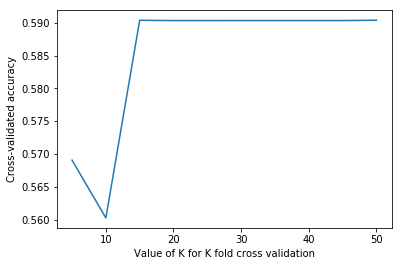

In [11]:
###################################################################
# Step: Visualize results of k-fold cross validation
###################################################################
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for K fold cross validation')
plt.ylabel('Cross-validated accuracy')